<h1> Thyroid Disease Analysis </h1>
<h4> Step 1: Importing Libraries </h4>

In [1]:
# Importing all the necessary Libraries
# Important Libraries
import pandas as pd
import numpy as np

#Libraries for analysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Libraries for testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Libraries for splitting
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(0)

<h4> Step 2: Importing Data Set </h4>

In [2]:
dia = pd.read_csv('E:/thyroidData.csv')
dia.head()

,TSH,T3,TT4,T4U,FTI,Class
0,0.00060,0.015,0.120,0.082,0.146,3
1,0.00025,0.030,0.143,0.133,0.108,3
2,0.00190,0.024,0.102,0.131,0.078,3
3,0.00090,0.017,0.077,0.090,0.085,3
4,0.00025,0.026,0.139,0.090,0.153,3


In [3]:
len(dia[dia.Class==1])

166

In [4]:
#dia.describe()

<h4> Step 3: Prepare the data </h4>

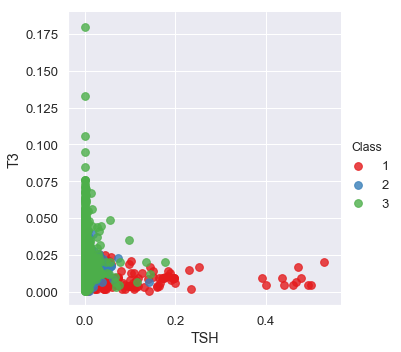

In [5]:
#plot two ingredients
sns.lmplot('TSH','T3', data = dia,hue='Class',
          palette='Set1',fit_reg=False,scatter_kws={"s":60})

In [6]:
#Splitting the datasets
X = dia.iloc[:,0:5] #ith location select all row and from column 0 to 7
y = dia.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)
print('No of obeservation in the training set:',len(X_train))
print('No of obeservation in the training set:',len(X_test))


No of obeservation in the training set: 5760
No of obeservation in the training set: 1440


<center><h3> Algorithm 1 : Support Vector Machine </h3> </center>
<h4> Step 4: Fit the Model </h4>

In [7]:
accu = []
ppv = []
sen = []
spec = []
f1 = []
C = [1,10,20,40,60,80,100,150,200,400,800,1000]
for c in C:
    model = svm.SVC(kernel='rbf',C=c, gamma=2**10,decision_function_shape='ovr',probability=True)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)
    mat = pd.crosstab(y_pred,y_test,rownames=['Predicted'],colnames=['Actual'])
    print("C = ",c)
    print(mat)
    
    # For Class A
    print("Class A:")
    TP,TN,FP,FN = cm[0][0],(cm[1][1]+cm[2][2]),(cm[0][1]+cm[0][2]),(cm[1][0]+cm[2][0])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_A = TP/(TP+FP)
    recall_A = TP/(TP+FN)
    specificity_A = TN/(FP+TN)
    F1_A = (2*TP)/(2*TP+FP+FN)
    acc_A = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_A)
    print("Recall: ",recall_A)
    print("Specificity: ",specificity_A)
    print("F1 Score: ",F1_A)
    print("Accuracy: ",acc_A)
    # For Class B
    print("Class B:")
    TP,TN,FP,FN = cm[1][1],(cm[0][0]+cm[2][2]),(cm[1][0]+cm[1][2]),(cm[0][1]+cm[2][1])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_B = TP/(TP+FP)
    recall_B = TP/(TP+FN)
    specificity_B = TN/(FP+TN)
    F1_B = (2*TP)/(2*TP+FP+FN)
    acc_B = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_B)
    print("Recall: ",recall_B)
    print("Specificity: ",specificity_B)
    print("F1 Score: ",F1_B)
    print("Accuracy: ",acc_B)
    # For Class C
    print("Class C:")
    TP,TN,FP,FN = cm[2][2],(cm[0][0]+cm[1][1]),(cm[2][0]+cm[2][1]),(cm[0][2]+cm[1][2])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_C = TP/(TP+FP)
    recall_C = TP/(TP+FN)
    specificity_C = TN/(FP+TN)
    F1_C = (2*TP)/(2*TP+FP+FN)
    acc_C = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_C)
    print("Recall: ",recall_C)
    print("Specificity: ",specificity_C)
    print("F1 Score: ",F1_C)
    print("Accuracy: ",acc_C)
    
    all_precision = (precision_A*39 + precision_B*83 + precision_C*1318) / 1440
    all_recall = (recall_A*39 + recall_B*83 + recall_C*1318) / 1440
    all_specificity = (specificity_A*39 + specificity_B*83 + specificity_C*1318) / 1440
    all_accuracy = (acc_A*39 + acc_B*83 + acc_C*1318) / 1440
    all_F1 =  (F1_A*39 + F1_B*83 + F1_C*1318) / 1440
    print("Overall Precision: ",all_precision)
    print("Overall Recall: ",all_recall)
    print("Overall Specificity: ",all_specificity)
    print("Overall Accuracy: ",all_accuracy)
    print("Overall F1 Score: ",all_F1)
    print("\n")
    accu.append(round(all_accuracy,4)*100)
    ppv.append(round(all_precision,4)*100)
    sen.append(round(all_recall,4)*100)
    spec.append(round(all_specificity,4)*100)
    f1.append(round(all_F1,4)*100)
    
    

    

C =  1
Actual      1   2     3
Predicted              
1          33   0     3
2           2  42    11
3           4  41  1304
Class A:
TP: 33   TN: 1346   FP: 3   FN: 6
Precision: 0.9166666666666666
Recall:  0.8461538461538461
Specificity:  0.9977761304670126
F1 Score:  0.88
Accuracy:  0.9935158501440923
Class B:
TP: 42   TN: 1337   FP: 13   FN: 41
Precision: 0.7636363636363637
Recall:  0.5060240963855421
Specificity:  0.9903703703703703
F1 Score:  0.6086956521739131
Accuracy:  0.9623168178646196
Class C:
TP: 1304   TN: 75   FP: 45   FN: 14
Precision: 0.9666419570051891
Recall:  0.9893778452200304
Specificity:  0.625
F1 Score:  0.9778777652793401
Accuracy:  0.958970792767733
Overall Precision:  0.953587442718512
Overall Recall:  0.9576388888888889
Overall Specificity:  0.6561555623812183
Overall Accuracy:  0.9600992492404549
Overall F1 Score:  0.9539476623393089


C =  10
Actual      1   2     3
Predicted              
1          31   0     3
2           2  54    14
3           6  29 

C =  800
Actual      1   2     3
Predicted              
1          34   0     3
2           2  58    18
3           3  25  1297
Class A:
TP: 34   TN: 1355   FP: 3   FN: 5
Precision: 0.918918918918919
Recall:  0.8717948717948718
Specificity:  0.9977908689248896
F1 Score:  0.8947368421052632
Accuracy:  0.9942734430923408
Class B:
TP: 58   TN: 1331   FP: 20   FN: 25
Precision: 0.7435897435897436
Recall:  0.6987951807228916
Specificity:  0.9851961509992598
F1 Score:  0.7204968944099379
Accuracy:  0.9686192468619247
Class C:
TP: 1297   TN: 92   FP: 28   FN: 21
Precision: 0.9788679245283018
Recall:  0.9840667678300455
Specificity:  0.7666666666666667
F1 Score:  0.9814604615966704
Accuracy:  0.9659248956884562
Overall Precision:  0.9636831326972838
Overall Recall:  0.9645833333333333
Overall Specificity:  0.7855220771442194
Overall Accuracy:  0.9668479682552266
Overall F1 Score:  0.9640700468489872


C =  1000
Actual      1   2     3
Predicted              
1          35   0     3
2         

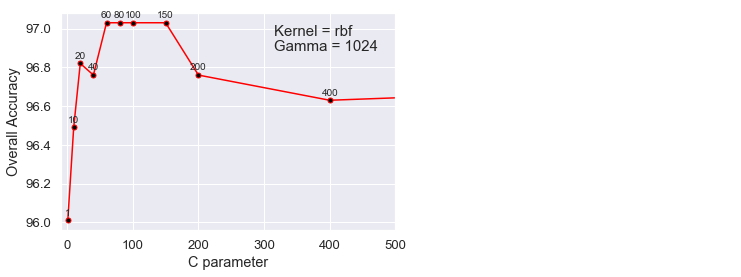

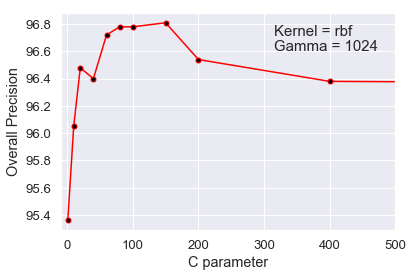

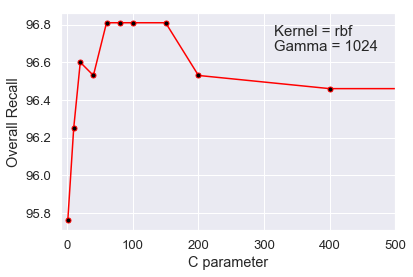

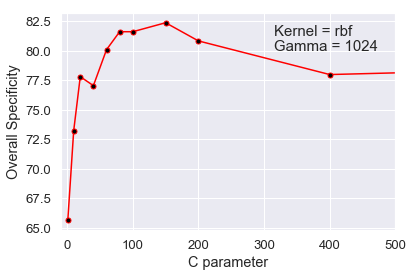

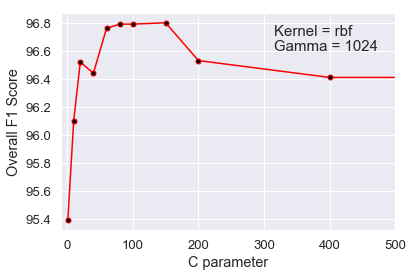

In [8]:
fig,ax = plt.subplots()
plt.plot(C,accu,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Accuracy')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = rbf",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
for i,txt in enumerate(C):
    ax.annotate(txt,(C[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig,ax = plt.subplots()
plt.plot(C,ppv,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Precision')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = rbf",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()
plt.plot(C,sen,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Recall')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = rbf",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()
plt.plot(C,spec,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Specificity')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = rbf",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()
plt.plot(C,f1,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall F1 Score')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = rbf",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()

In [9]:
accu = []
ppv = []
sen = []
spec = []
f1 = []
C = [1,10,20,40,60,80,100,150,200,400,800,1000]
for c in C:
    model = svm.SVC(kernel='sigmoid',C=c, gamma=2**10,decision_function_shape='ovr',probability=True)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)
    mat = pd.crosstab(y_pred,y_test,rownames=['Predicted'],colnames=['Actual'])
    print("C = ",c)
    print(mat)
    
    # For Class A
    print("Class A:")
    TP,TN,FP,FN = cm[0][0],(cm[1][1]+cm[2][2]),(cm[0][1]+cm[0][2]),(cm[1][0]+cm[2][0])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_A = TP/(TP+FP)
    recall_A = TP/(TP+FN)
    specificity_A = TN/(FP+TN)
    F1_A = (2*TP)/(2*TP+FP+FN)
    acc_A = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_A)
    print("Recall: ",recall_A)
    print("Specificity: ",specificity_A)
    print("F1 Score: ",F1_A)
    print("Accuracy: ",acc_A)
    # For Class B
    print("Class B:")
    TP,TN,FP,FN = cm[1][1],(cm[0][0]+cm[2][2]),(cm[1][0]+cm[1][2]),(cm[0][1]+cm[2][1])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_B = TP/(TP+FP)
    recall_B = TP/(TP+FN)
    specificity_B = TN/(FP+TN)
    F1_B = (2*TP)/(2*TP+FP+FN)
    acc_B = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_B)
    print("Recall: ",recall_B)
    print("Specificity: ",specificity_B)
    print("F1 Score: ",F1_B)
    print("Accuracy: ",acc_B)
    # For Class C
    print("Class C:")
    TP,TN,FP,FN = cm[2][2],(cm[0][0]+cm[1][1]),(cm[2][0]+cm[2][1]),(cm[0][2]+cm[1][2])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_C = TP/(TP+FP)
    recall_C = TP/(TP+FN)
    specificity_C = TN/(FP+TN)
    F1_C = (2*TP)/(2*TP+FP+FN)
    acc_C = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_C)
    print("Recall: ",recall_C)
    print("Specificity: ",specificity_C)
    print("F1 Score: ",F1_C)
    print("Accuracy: ",acc_C)
    
    all_precision = (precision_A*39 + precision_B*83 + precision_C*1318) / 1440
    all_recall = (recall_A*39 + recall_B*83 + recall_C*1318) / 1440
    all_specificity = (specificity_A*39 + specificity_B*83 + specificity_C*1318) / 1440
    all_accuracy = (acc_A*39 + acc_B*83 + acc_C*1318) / 1440
    all_F1 =  (F1_A*39 + F1_B*83 + F1_C*1318) / 1440
    print("Overall Precision: ",all_precision)
    print("Overall Recall: ",all_recall)
    print("Overall Specificity: ",all_specificity)
    print("Overall Accuracy: ",all_accuracy)
    print("Overall F1 Score: ",all_F1)
    print("\n")
    accu.append(round(all_accuracy,4)*100)
    ppv.append(round(all_precision,4)*100)
    sen.append(round(all_recall,4)*100)
    spec.append(round(all_specificity,4)*100)
    f1.append(round(all_F1,4)*100)

C =  1
Actual      1   2     3
Predicted              
3          39  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 0   FN: 83
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.940756602426838
Class C:
TP: 1318   TN: 0   FP: 122   FN: 0
Precision: 0.9152777777777777
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9557650471356055
Accuracy:  0.9152777777777777
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08472222222222223
Overall Accuracy:  0.9182625376984129
Overall F1 Score:  0.87479050841995




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


C =  10
Actual      1   2     3
Predicted              
3          39  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 0   FN: 83
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.940756602426838
Class C:
TP: 1318   TN: 0   FP: 122   FN: 0
Precision: 0.9152777777777777
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9557650471356055
Accuracy:  0.9152777777777777
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08472222222222223
Overall Accuracy:  0.9182625376984129
Overall F1 Score:  0.87479050841995




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


C =  20
Actual      1   2     3
Predicted              
3          39  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 0   FN: 83
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.940756602426838
Class C:
TP: 1318   TN: 0   FP: 122   FN: 0
Precision: 0.9152777777777777
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9557650471356055
Accuracy:  0.9152777777777777
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08472222222222223
Overall Accuracy:  0.9182625376984129
Overall F1 Score:  0.87479050841995




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


C =  40
Actual      1   2     3
Predicted              
3          39  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 0   FN: 83
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.940756602426838
Class C:
TP: 1318   TN: 0   FP: 122   FN: 0
Precision: 0.9152777777777777
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9557650471356055
Accuracy:  0.9152777777777777
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08472222222222223
Overall Accuracy:  0.9182625376984129
Overall F1 Score:  0.87479050841995




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


C =  60
Actual      1   2     3
Predicted              
3          39  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 0   FN: 83
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.940756602426838
Class C:
TP: 1318   TN: 0   FP: 122   FN: 0
Precision: 0.9152777777777777
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9557650471356055
Accuracy:  0.9152777777777777
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08472222222222223
Overall Accuracy:  0.9182625376984129
Overall F1 Score:  0.87479050841995




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


C =  80
Actual      1   2     3
Predicted              
2           1   0     0
3          38  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 1   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9992418498862775
F1 Score:  0.0
Accuracy:  0.9400855920114123
Class C:
TP: 1318   TN: 0   FP: 121   FN: 0
Precision: 0.9159138290479499
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9561117156329344
Accuracy:  0.9159138290479499
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08467852329205627
Overall Accuracy:  0.9188060249967509
Overall F1 Score:  0.8751078063918108




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


C =  100
Actual      1   2     3
Predicted              
2           1   0     0
3          38  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 1   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9992418498862775
F1 Score:  0.0
Accuracy:  0.9400855920114123
Class C:
TP: 1318   TN: 0   FP: 121   FN: 0
Precision: 0.9159138290479499
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9561117156329344
Accuracy:  0.9159138290479499
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08467852329205627
Overall Accuracy:  0.9188060249967509
Overall F1 Score:  0.8751078063918108




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


C =  150
Actual      1   2     3
Predicted              
2           1   0     0
3          38  83  1318
Class A:
TP: 0   TN: 1318   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712601326455417
Class B:
TP: 0   TN: 1318   FP: 1   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9992418498862775
F1 Score:  0.0
Accuracy:  0.9400855920114123
Class C:
TP: 1318   TN: 0   FP: 121   FN: 0
Precision: 0.9159138290479499
Recall:  1.0
Specificity:  0.0
F1 Score:  0.9561117156329344
Accuracy:  0.9159138290479499
Overall Precision:  nan
Overall Recall:  0.9152777777777777
Overall Specificity:  0.08467852329205627
Overall Accuracy:  0.9188060249967509
Overall F1 Score:  0.8751078063918108




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


C =  200
Actual      1   2     3
Predicted              
2           1   0     1
3          38  83  1317
Class A:
TP: 0   TN: 1317   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712389380530974
Class B:
TP: 0   TN: 1317   FP: 2   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9984836997725549
F1 Score:  0.0
Accuracy:  0.9393723252496433
Class C:
TP: 1317   TN: 0   FP: 121   FN: 1
Precision: 0.9158553546592489
Recall:  0.9992412746585736
Specificity:  0.0
F1 Score:  0.9557329462989841
Accuracy:  0.9152189020152884
Overall Precision:  nan
Overall Recall:  0.9145833333333333
Overall Specificity:  0.08463482436189032
Overall Accuracy:  0.9181282878027371
Overall F1 Score:  0.8747611272375424




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


C =  400
Actual      1   2     3
Predicted              
2           1   0     1
3          38  83  1317
Class A:
TP: 0   TN: 1317   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712389380530974
Class B:
TP: 0   TN: 1317   FP: 2   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9984836997725549
F1 Score:  0.0
Accuracy:  0.9393723252496433
Class C:
TP: 1317   TN: 0   FP: 121   FN: 1
Precision: 0.9158553546592489
Recall:  0.9992412746585736
Specificity:  0.0
F1 Score:  0.9557329462989841
Accuracy:  0.9152189020152884
Overall Precision:  nan
Overall Recall:  0.9145833333333333
Overall Specificity:  0.08463482436189032
Overall Accuracy:  0.9181282878027371
Overall F1 Score:  0.8747611272375424




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


C =  800
Actual      1   2     3
Predicted              
2           2   0     1
3          37  83  1317
Class A:
TP: 0   TN: 1317   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712389380530974
Class B:
TP: 0   TN: 1317   FP: 3   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9977272727272727
F1 Score:  0.0
Accuracy:  0.9387027797576621
Class C:
TP: 1317   TN: 0   FP: 120   FN: 1
Precision: 0.9164926931106472
Recall:  0.9992412746585736
Specificity:  0.0
F1 Score:  0.9560798548094374
Accuracy:  0.9158553546592489
Overall Precision:  nan
Overall Recall:  0.9145833333333333
Overall Specificity:  0.08459122474747474
Overall Accuracy:  0.9186722269061437
Overall F1 Score:  0.8750786448880823




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


C =  1000
Actual      1   2     3
Predicted              
2           3   0     1
3          36  83  1317
Class A:
TP: 0   TN: 1317   FP: 0   FN: 39
Precision: nan
Recall:  0.0
Specificity:  1.0
F1 Score:  0.0
Accuracy:  0.9712389380530974
Class B:
TP: 0   TN: 1317   FP: 4   FN: 83
Precision: 0.0
Recall:  0.0
Specificity:  0.9969719909159728
F1 Score:  0.0
Accuracy:  0.938034188034188
Class C:
TP: 1317   TN: 0   FP: 119   FN: 1
Precision: 0.9171309192200557
Recall:  0.9992412746585736
Specificity:  0.0
F1 Score:  0.9564270152505446
Accuracy:  0.9164926931106472
Overall Precision:  nan
Overall Recall:  0.9145833333333333
Overall Specificity:  0.08454769114307344
Overall Accuracy:  0.9192170317435704
Overall F1 Score:  0.8753963931251513




C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


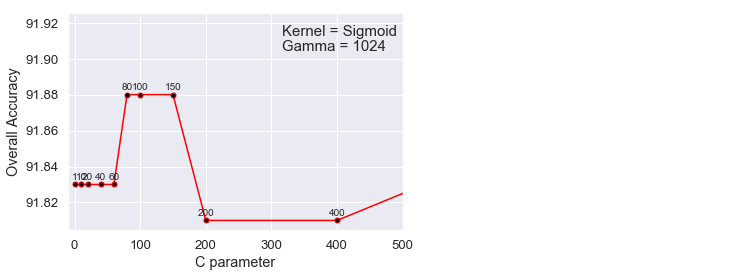

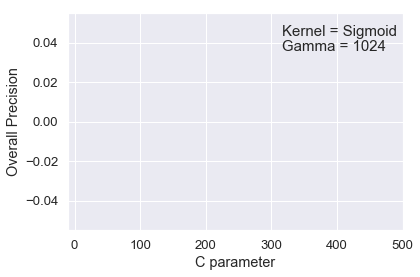

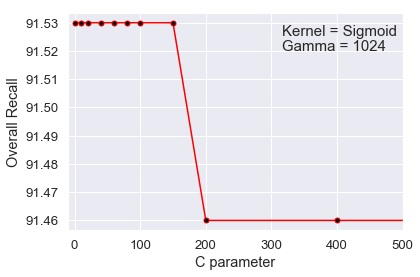

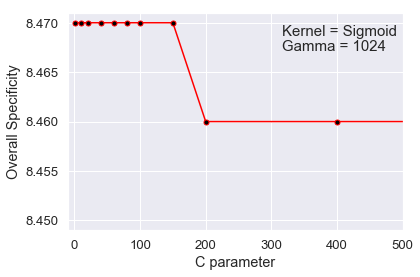

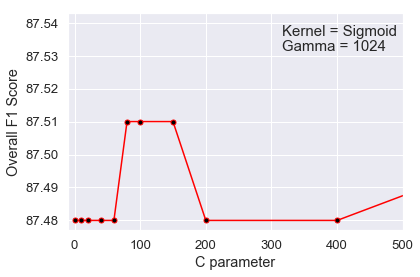

In [10]:
fig,ax = plt.subplots()
plt.plot(C,accu,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Accuracy')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = Sigmoid",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
for i,txt in enumerate(C):
    ax.annotate(txt,(C[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig,ax = plt.subplots()
plt.plot(C,ppv,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Precision')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = Sigmoid",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()
plt.plot(C,sen,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Recall')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = Sigmoid",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()
plt.plot(C,spec,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall Specificity')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = Sigmoid",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()
plt.plot(C,f1,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('C parameter')
plt.ylabel('Overall F1 Score')
plt.xlim(-10,500)
plt.figtext(.62,.8,"Kernel = Sigmoid",fontsize = 15)
plt.figtext(.62,.75,"Gamma = 1024",fontsize = 15)
plt.show()

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91        39
           2       0.73      0.70      0.72        83
           3       0.98      0.98      0.98      1318

   micro avg       0.96      0.96      0.96      1440
   macro avg       0.88      0.86      0.87      1440
weighted avg       0.96      0.96      0.96      1440



In [11]:
n = [0.1,1.0,10]
for x in n:
    print("X = ", x)
    #creating a random forest classifier
    clf = RandomForestClassifier(n_jobs=2,min_samples_split=n, random_state=0)
    #training the classifier
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)
    print(cm)
    # For Class A
    print("Class A:")
    TP,TN,FP,FN = cm[0][0],(cm[1][1]+cm[2][2]),(cm[0][1]+cm[0][2]),(cm[1][0]+cm[2][0])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_A = TP/(TP+FP)
    recall_A = TP/(TP+FN)
    specificity_A = TN/(FP+TN)
    F1_A = (2*TP)/(2*TP+FP+FN)
    acc_A = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_A)
    print("Recall: ",recall_A)
    print("Specificity: ",specificity_A)
    print("F1 Score: ",F1_A)
    print("Accuracy: ",acc_A)
    # For Class B
    #print("\n")
    print("Class B:")
    TP,TN,FP,FN = cm[1][1],(cm[0][0]+cm[2][2]),(cm[1][0]+cm[1][2]),(cm[0][1]+cm[2][1])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_B = TP/(TP+FP)
    recall_B = TP/(TP+FN)
    specificity_B = TN/(FP+TN)
    F1_B = (2*TP)/(2*TP+FP+FN)
    acc_B = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_B)
    print("Recall: ",recall_B)
    print("Specificity: ",specificity_B)
    print("F1 Score: ",F1_B)
    print("Accuracy: ",acc_B)
    # For Class C
    #print("\n")
    print("Class C:")
    TP,TN,FP,FN = cm[2][2],(cm[0][0]+cm[1][1]),(cm[2][0]+cm[2][1]),(cm[0][2]+cm[1][2])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_C = TP/(TP+FP)
    recall_C = TP/(TP+FN)
    specificity_C = TN/(FP+TN)
    F1_C = (2*TP)/(2*TP+FP+FN)
    acc_C = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_C)
    print("Recall: ",recall_C)
    print("Specificity: ",specificity_C)
    print("F1 Score: ",F1_C)
    print("Accuracy: ",acc_C)
    #print("\n")
    all_precision = (precision_A*39 + precision_B*83 + precision_C*1318) / 1440
    all_recall = (recall_A*39 + recall_B*83 + recall_C*1318) / 1440
    all_specificity = (specificity_A*39 + specificity_B*83 + specificity_C*1318) / 1440
    all_accuracy = (acc_A*39 + acc_B*83 + acc_C*1318) / 1440
    all_F1 =  (F1_A*39 + F1_B*83 + F1_C*1318) / 1440
    print("Overall Precision: ",all_precision)
    print("Overall Recall: ",all_recall)
    print("Overall Specificity: ",all_specificity)
    print("Overall Accuracy: ",all_accuracy)
    print("Overall F1 Score: ",all_F1)
    print("\n")

X =  0.1


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TypeError: '<' not supported between instances of 'float' and 'list'

<center><h2> Algorithm 3:  K Nearest Neighbours </h2> </center>
<h4> Step 4: Fit the Model </h4>

In [12]:
#feature Scaling:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
import math
math.sqrt(len(y_test))

37.94733192202055

In [13]:
#Define the model: Init KNN
knn = KNeighborsClassifier(n_neighbors=1,p=2,metric='euclidean')

#fit Model
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

<h4> Step 5: Confusion Matrix and Model Analysis </h4>

In [14]:
y_pred = knn.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [15]:
# Evaluating the model
#cm = confusion_matrix(y_test,y_pred)
#Creating Confusion matrix
mat = pd.crosstab(y_pred,y_test,rownames=['Predicted'],colnames=['Actual'])
mat

Actual,1,2,3
Predicted,,,
1,28,1,4
2,5,48,16
3,6,34,1298


In [16]:
correct = mat[1][1] + mat[2][2] + mat[3][3]
acuracy = (correct/len(X_test)) * 100
print(acuracy)

95.41666666666667


In [17]:
knn.score(X_test,y_test)

0.9541666666666667

<h4> Step 6: Predict a new Case </h4>

In [18]:
dia[7000:7005]

,TSH,T3,TT4,T4U,FTI,Class
7000,0.00190,0.015,0.102,0.080,0.128,3
7001,0.00839,0.017,0.094,0.084,0.112,2
7002,0.00100,0.027,0.161,0.092,0.175,3
7003,0.00056,0.029,0.158,0.075,0.211,3
7004,0.00220,0.024,0.085,0.055,0.155,3


In [19]:
new = [[0.00839,0.017,0.094,0.084,0.112],[0.02500,0.0040,0.03900,0.061,0.06400]]
clf.predict(new)

NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

<center> <h2>Algorithm 4: Artificial Neural Network </h2> </center>